In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("../Data/cleanedSampleNoMidnight.csv",low_memory=False)

In [3]:
df

,Longitude,Latitude,Street,Day,Violation Code,Time Range
0,49.890180,-97.142286,Donald ST,Friday,1,Daytime (9:00am-3:30pm)
1,49.897200,-97.134900,Bannatyne AVE,Thursday,1,Daytime (9:00am-3:30pm)
2,49.884645,-97.144515,Kennedy ST,Monday,13,Evening (5:00pm-11:00pm)
3,49.890795,-97.140983,St Mary AVE,Tuesday,1,Daytime (9:00am-3:30pm)
4,49.863078,-97.144373,Osborne ST,Wednesday,1,Daytime (9:00am-3:30pm)
...,...,...,...,...,...,...
99995,49.889663,-97.148775,Vaughan ST,Wednesday,13,Daytime (9:00am-3:30pm)
99996,49.887138,-97.144040,Edmonton ST,Thursday,1,Rush Hour Morning (7:30am-9:00am)
99997,49.904600,-97.157400,William AVE,Wednesday,3,Rush Hour Morning (7:30am-9:00am)
99998,49.894165,-97.136211,Pioneer AVE,Tuesday,1,Rush Hour Evening (3:30pm-5:00pm)


In [4]:
# Select the columns to encode
columns_to_encode = ['Day', 'Violation Code', 'Street',"Time Range"]

# Create the OneHotEncoder object
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore',dtype=np.bool_)

# Fit the encoder to the data
encoder.fit(df[columns_to_encode])

# Transform the data
encoded_data = encoder.transform(df[columns_to_encode])

# Create column names for the encoded data
encoded_columns = encoder.get_feature_names_out(columns_to_encode)

encoded_columns_df = pd.DataFrame(encoded_data, columns=encoded_columns)

encoded_columns_df = encoded_columns_df.astype(np.bool_)

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [5]:
encoded_columns_df

,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Violation Code_1,Violation Code_2,Violation Code_3,...,Street_Yorkwood DR,Street_Young ST,Street_Zawaly BAY,Street_Zoe LANE,Time Range_Daytime (9:00am-3:30pm),Time Range_Early Morning (5:30am-7:30am),Time Range_Evening (5:00pm-11:00pm),Time Range_Overnight (11:00pm-5:30am),Time Range_Rush Hour Evening (3:30pm-5:00pm),Time Range_Rush Hour Morning (7:30am-9:00am)
0,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,True,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,True,True,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
99996,False,False,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
99997,False,False,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,True
99998,False,False,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False


In [6]:
df = df[['Longitude','Latitude']]
df = df.astype(np.float16)
encoded_columns_df["Latitude"] = df["Latitude"]
encoded_columns_df["Longitude"] = df["Longitude"]

In [7]:
df = encoded_columns_df
df

,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Violation Code_1,Violation Code_2,Violation Code_3,...,Street_Zawaly BAY,Street_Zoe LANE,Time Range_Daytime (9:00am-3:30pm),Time Range_Early Morning (5:30am-7:30am),Time Range_Evening (5:00pm-11:00pm),Time Range_Overnight (11:00pm-5:30am),Time Range_Rush Hour Evening (3:30pm-5:00pm),Time Range_Rush Hour Morning (7:30am-9:00am),Latitude,Longitude
0,True,False,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,-97.1250,49.87500
1,False,False,False,False,True,False,False,True,False,False,...,False,False,True,False,False,False,False,False,-97.1250,49.90625
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,-97.1250,49.87500
3,False,False,False,False,False,True,False,True,False,False,...,False,False,True,False,False,False,False,False,-97.1250,49.90625
4,False,False,False,False,False,False,True,True,False,False,...,False,False,True,False,False,False,False,False,-97.1250,49.87500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,-97.1250,49.87500
99996,False,False,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,True,-97.1250,49.87500
99997,False,False,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,True,-97.1875,49.90625
99998,False,False,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,True,False,-97.1250,49.90625


In [8]:
numericalCols = ["Longitude","Latitude"]
numericalData = df[numericalCols]

# standardize the numerical data to have a mean of 0 and a variance of 1
scaler = StandardScaler()
numericalDataScaled = scaler.fit_transform(numericalData)
df[numericalCols] = numericalDataScaled
df

,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Violation Code_1,Violation Code_2,Violation Code_3,...,Street_Zawaly BAY,Street_Zoe LANE,Time Range_Daytime (9:00am-3:30pm),Time Range_Early Morning (5:30am-7:30am),Time Range_Evening (5:00pm-11:00pm),Time Range_Overnight (11:00pm-5:30am),Time Range_Rush Hour Evening (3:30pm-5:00pm),Time Range_Rush Hour Morning (7:30am-9:00am),Latitude,Longitude
0,True,False,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,0.374268,-0.575684
1,False,False,False,False,True,False,False,True,False,False,...,False,False,True,False,False,False,False,False,0.374268,0.603027
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,0.374268,-0.575684
3,False,False,False,False,False,True,False,True,False,False,...,False,False,True,False,False,False,False,False,0.374268,0.603027
4,False,False,False,False,False,False,True,True,False,False,...,False,False,True,False,False,False,False,False,0.374268,-0.575684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,0.374268,-0.575684
99996,False,False,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,True,0.374268,-0.575684
99997,False,False,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,True,-1.267578,0.603027
99998,False,False,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,True,False,0.374268,0.603027


In [9]:
dbscan = DBSCAN()

# Fit the model to the data
dbscan.fit_predict(df)

# add the cluster labels to the original dataframe
df['Clusters'] = dbscan.labels_

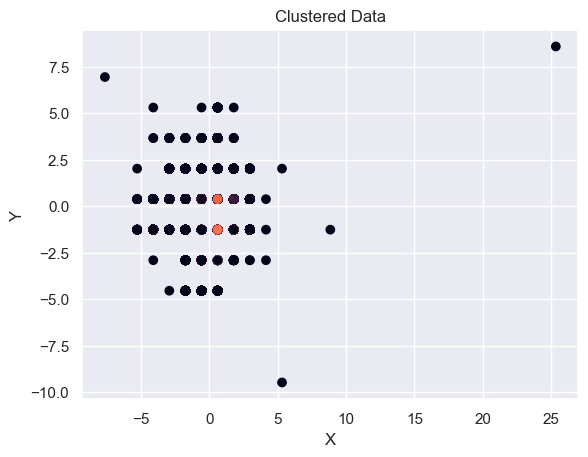

In [10]:
plt.scatter(df['Longitude'], df['Latitude'], c=df["Clusters"])
plt.title('Clustered Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [11]:
df

,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Violation Code_1,Violation Code_2,Violation Code_3,...,Street_Zoe LANE,Time Range_Daytime (9:00am-3:30pm),Time Range_Early Morning (5:30am-7:30am),Time Range_Evening (5:00pm-11:00pm),Time Range_Overnight (11:00pm-5:30am),Time Range_Rush Hour Evening (3:30pm-5:00pm),Time Range_Rush Hour Morning (7:30am-9:00am),Latitude,Longitude,Clusters
0,True,False,False,False,False,False,False,True,False,False,...,False,True,False,False,False,False,False,0.374268,-0.575684,0
1,False,False,False,False,True,False,False,True,False,False,...,False,True,False,False,False,False,False,0.374268,0.603027,1
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,0.374268,-0.575684,2
3,False,False,False,False,False,True,False,True,False,False,...,False,True,False,False,False,False,False,0.374268,0.603027,3
4,False,False,False,False,False,False,True,True,False,False,...,False,True,False,False,False,False,False,0.374268,-0.575684,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,0.374268,-0.575684,-1
99996,False,False,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,True,0.374268,-0.575684,1316
99997,False,False,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,True,-1.267578,0.603027,2688
99998,False,False,False,False,False,True,False,True,False,False,...,False,False,False,False,False,True,False,0.374268,0.603027,2586


In [12]:
decoded_data = encoder.inverse_transform(encoded_data)
decoded_data

array([['Friday', 1, 'Donald ST', 'Daytime (9:00am-3:30pm)'],
       ['Thursday', 1, 'Bannatyne AVE', 'Daytime (9:00am-3:30pm)'],
       ['Monday', 13, 'Kennedy ST', 'Evening (5:00pm-11:00pm)'],
       ...,
       ['Wednesday', 3, 'William AVE',
        'Rush Hour Morning (7:30am-9:00am)'],
       ['Tuesday', 1, 'Pioneer AVE', 'Rush Hour Evening (3:30pm-5:00pm)'],
       ['Thursday', 1, 'Kennedy ST', 'Daytime (9:00am-3:30pm)']],
      dtype=object)

In [13]:
decodedDf= pd.DataFrame(decoded_data,columns=["Day","Violation Code","Street","Time Range"])
decodedDf["Cluster"]=df["Clusters"]
decodedDf

,Day,Violation Code,Street,Time Range,Cluster
0,Friday,1,Donald ST,Daytime (9:00am-3:30pm),0
1,Thursday,1,Bannatyne AVE,Daytime (9:00am-3:30pm),1
2,Monday,13,Kennedy ST,Evening (5:00pm-11:00pm),2
3,Tuesday,1,St Mary AVE,Daytime (9:00am-3:30pm),3
4,Wednesday,1,Osborne ST,Daytime (9:00am-3:30pm),4
...,...,...,...,...,...
99995,Wednesday,13,Vaughan ST,Daytime (9:00am-3:30pm),-1
99996,Thursday,1,Edmonton ST,Rush Hour Morning (7:30am-9:00am),1316
99997,Wednesday,3,William AVE,Rush Hour Morning (7:30am-9:00am),2688
99998,Tuesday,1,Pioneer AVE,Rush Hour Evening (3:30pm-5:00pm),2586


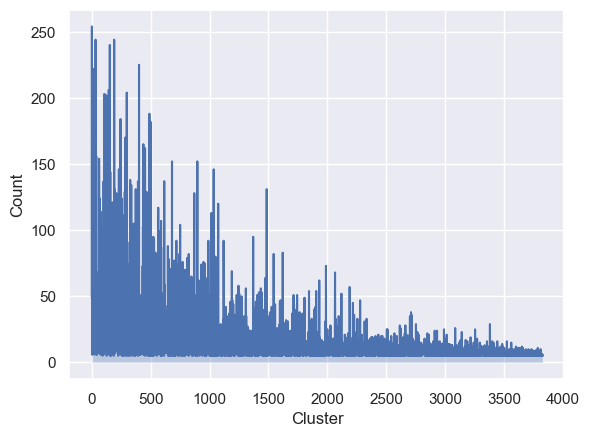

In [14]:

# get the counts of the Cluster column
counts = decodedDf['Cluster'].value_counts()
counts_df = pd.DataFrame({'Cluster': counts.index, 'Count': counts.values})
noise = counts_df.iloc[0]
counts_df = counts_df.drop(counts_df.index[0])


counts_df = counts_df.sort_values('Cluster')
# plot the line chart
plt.plot(counts_df['Cluster'], counts_df['Count'])

# fill in the area underneath the line chart
plt.fill_between(counts_df['Cluster'], counts_df['Count'], alpha=0.3)

# set the x and y axis labels
plt.xlabel('Cluster')
plt.ylabel('Count')

plt.show()

In [15]:
noise

Cluster       -1
Count      38900
Name: 0, dtype: int64

In [16]:
dfnoLoc = df.drop(["Longitude","Latitude"],axis=1)
dbscan2 = DBSCAN()
dbscan2.fit_predict(dfnoLoc)

# add the cluster labels to the original dataframe
dfnoLoc['Clusters'] = dbscan2.labels_

In [18]:
graphData = pd.concat([pd.DataFrame(numericalDataScaled,columns=numericalCols), dfnoLoc], axis=1)

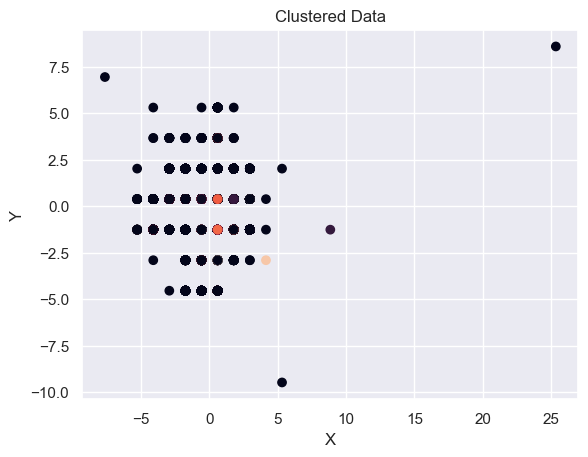

In [19]:
plt.scatter(graphData['Longitude'], graphData['Latitude'], c=graphData["Clusters"])
plt.title('Clustered Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [21]:
decoded_data2 = encoder.inverse_transform(dfnoLoc.drop("Clusters",axis=1))
decodedDf2= pd.DataFrame(decoded_data2,columns=["Day","Violation Code","Street","Time Range"])
decodedDf2["Cluster"]=df["Clusters"]

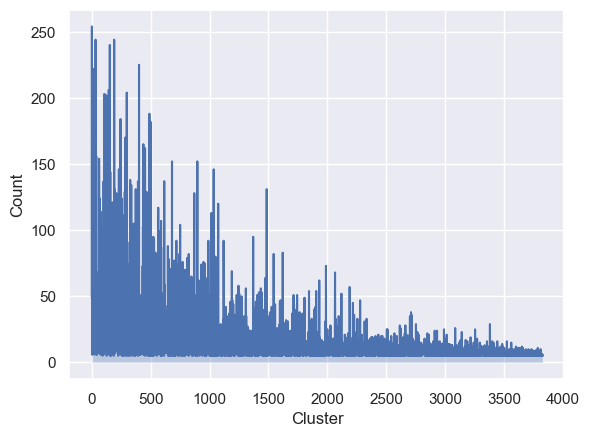

In [22]:
# get the counts of the Cluster column
counts2 = decodedDf2['Cluster'].value_counts()
counts_df2 = pd.DataFrame({'Cluster': counts2.index, 'Count': counts2.values})
noise2 = counts_df2.iloc[0]
counts_df2 = counts_df2.drop(counts_df2.index[0])


counts_df2 = counts_df2.sort_values('Cluster')
# plot the line chart
plt.plot(counts_df2['Cluster'], counts_df2['Count'])

# fill in the area underneath the line chart
plt.fill_between(counts_df2['Cluster'], counts_df2['Count'], alpha=0.3)

# set the x and y axis labels
plt.xlabel('Cluster')
plt.ylabel('Count')

plt.show()

In [23]:
noise2

Cluster       -1
Count      38900
Name: 0, dtype: int64